In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('CSAT.xlsx', sheet_name='CSAT answers')

In [3]:
missing = (
    df.isna().sum()
      .sort_values(ascending=False)
      .to_frame('missing_count')
)

missing['missing_percent'] = (missing['missing_count'] / len(df)) * 100
missing.reset_index().rename(columns={'index': 'column'})


,column,missing_count,missing_percent
0,contact_method,20979,100.000000
1,Resolved,17654,84.150817
2,Categories,16449,78.406978
3,Sentiment_Score,6422,30.611564
4,comments_verb,6375,30.387530
5,Sub_Area,2395,11.416178
6,Department,1846,8.799275
7,Channel,1844,8.789742
8,Area,1397,6.659040
9,Journey,8,0.038133


In [4]:
df['cid'].value_counts()

cid
10    15344
44     4320
43      718
42      597
Name: count, dtype: int64

In [5]:
df['Resolved'].value_counts()

Resolved
1.0    1892
0.0    1433
Name: count, dtype: int64

In [6]:
df.drop(columns = ['contact_method','Categories'], inplace=True)

In [7]:
df[df['cid'] == 44]['Resolved'].isnull().sum()/len(df[df['cid'] == 44])

0.37060185185185185

In [8]:
df[df['cid'] == 42]['Resolved'].isnull().sum()/len(df[df['cid'] == 42])

0.6147403685092128

In [9]:
df[df['cid'] == 43]['Resolved'].isnull().sum()/len(df[df['cid'] == 43])

0.4763231197771588

In [10]:
df.groupby('Department')['Business_Unit'].nunique().sort_values(ascending=False).head(20)
#there is no clean hierarchy between Department and Business Unit, same with (Sub_Area -> Area, Area → Journey, Sub_Area → Journey)


Department
Operations Services Centre - Partner Service    4
Operations Services Centre - Social Media       4
Operations Services Centre - OCC                4
Operations Services Centre - 24 hours           3
BAU Support                                     2
CONTACT CENTRE OPERATIONS                       2
Contractor - Lanes Planning & Scheduling        2
Operations Services Centre - VT                 2
BG - Clean TW NL Office - Technical Services    2
Thames Water - Case Management                  1
Thames Water  - First Contact                   1
Tech Mahindra - First Contact                   1
Tech Mahindra - WebChat                         1
Thames Water - Case manager                     1
Tech Mahindra - Web Chat                        1
Tech Mahindra - First contact                   1
Tech Mahindra- First Contact                    1
#                                               1
Tech Mahindra - 2 Way Messaging                 1
Thames Water - Collective Billing      

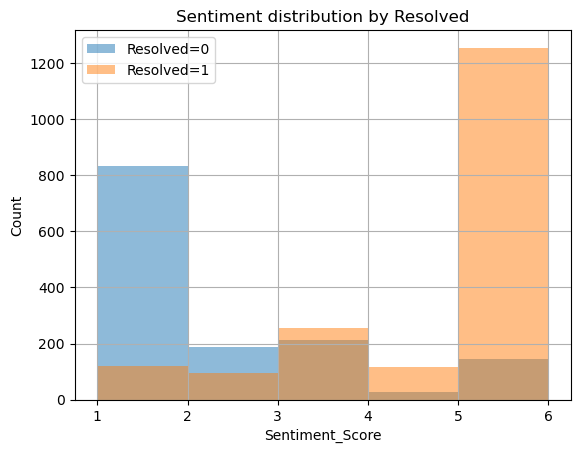

In [11]:
for r in [0, 1]:
    subset = df[df['Resolved'] == r]['Sentiment_Score']
    subset.hist(alpha=0.5, bins=[1, 2, 3, 4, 5, 6])
plt.xlabel('Sentiment_Score')
plt.ylabel('Count')
plt.title('Sentiment distribution by Resolved')
plt.legend(['Resolved=0', 'Resolved=1'])
plt.show()


In [ ]:
sentiment_df = []

for i in range(1,6):
    temp = df[df['Sentiment_Score'] == i]['Resolved'].value_counts(normalize=True) * 100
    
    sentiment_df.append({
        'Sentiment_Score': i,
        'Resolved_Yes_%': round(temp.get(1, 0),2),
        'Resolved_No_%': round(temp.get(0, 0),2)
    })

sentiment_df = pd.DataFrame(sentiment_df).set_index('Sentiment_Score')
sentiment_df

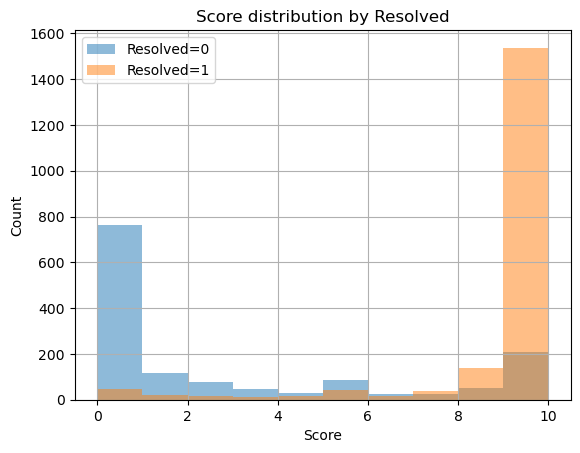

In [ ]:
for r in [0, 1]:
    subset = df[df['Resolved'] == r]['Score']
    subset.hist(alpha=0.5, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score distribution by Resolved')
plt.legend(['Resolved=0', 'Resolved=1'])
plt.show()


In [ ]:
score_df = []

for i in range(1,11):
    temp = df[df['Score'] == i]['Resolved'].value_counts(normalize=True) * 100
    
    score_df.append({
        'Score': i,
        'Resolved_Yes_%': round(temp.get(1, 0),2),
        'Resolved_No_%': round(temp.get(0, 0),2)
    })

score_df = pd.DataFrame(score_df).set_index('Score')
score_df

,Resolved_Yes_%,Resolved_No_%
Score,,
1,14.07,85.93
2,17.02,82.98
3,20.97,79.03
4,35.42,64.58
5,32.82,67.18
6,42.86,57.14
7,60.61,39.39
8,73.30,26.70
9,79.30,20.70


In [ ]:
df['comment_lower'] = df['comments_verb'].str.lower().fillna('')

keywords = ['resolved', 'fixed', 'not resolved', 'still', 'no one', 'issue', 'problem']

for kw in keywords:
    mask = df['comment_lower'].str.contains(kw)
    print(f'\nKeyword: "{kw}"')
    print(df.loc[mask].groupby('Resolved')['Resolved'].count())



Keyword: "resolved"
Resolved
0.0    121
1.0    108
Name: Resolved, dtype: int64

Keyword: "fixed"
Resolved
0.0    28
1.0    38
Name: Resolved, dtype: int64

Keyword: "not resolved"
Resolved
0.0    42
1.0     2
Name: Resolved, dtype: int64

Keyword: "still"
Resolved
0.0    215
1.0     17
Name: Resolved, dtype: int64

Keyword: "no one"
Resolved
0.0    36
1.0     3
Name: Resolved, dtype: int64

Keyword: "issue"
Resolved
0.0    165
1.0    165
Name: Resolved, dtype: int64

Keyword: "problem"
Resolved
0.0    168
1.0    257
Name: Resolved, dtype: int64


In [ ]:
df.loc[(df['Score'] >= 7) & (df['Sentiment_Score'] >= 4) & (df['cid'] != 10) & (df['Resolved'].isna()), 'Resolved'] = 1
df.loc[(df['Score'] <= 3) & (df['Sentiment_Score'] <= 2) & (df['cid'] != 10) & (df['Resolved'].isna()), 'Resolved'] = 0

In [ ]:
df.to_excel('CSAT_Cleaned.csv', sheet_name='CSAT answers', index=False)